In [1]:
#CV Course Project- Road Classification TY ET A Batch 2 Group 1

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.cluster import KMeans

In [19]:
img = cv2.imread('D:\TYETA\CV\s2.jpg')

[[ 89 251 195 ... 182 130 121]
 [ 18 180 222 ... 170  49 177]
 [ 42 251  99 ... 150  71 253]
 ...
 [247 115 233 ... 251 114 147]
 [ 46 113  58 ... 143  54 247]
 [235 122 236 ... 244  78 221]]
(500, 32)


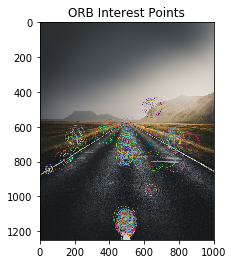

In [20]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from cv's BRG default color order to RGB

orb = cv2.ORB_create()  # OpenCV 3 backward incompatibility: Do not create a detector with `cv2.ORB()`.
key_points, description = orb.detectAndCompute(img, None)
img_keypoints = cv2.drawKeypoints(img,key_points,img, 
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.
print(description)
print(description.shape)
plt.figure()
plt.title('ORB Interest Points')
plt.imshow(img_keypoints); plt.show()

In [21]:
import cv2
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans

main_folder=r"D:\TYETA\CV\Data_Set"

for folder in os.listdir(main_folder):
    path=os.path.join(main_folder,folder)
    for filename in os.listdir(path):
        p=os.path.join(path,filename)
        a=cv2.imread(p)
        resize=(300,300)
        img=cv2.resize(a,resize)#resize image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        orb = cv2.ORB_create()#initialise  detector
        keypoints, descriptors = orb.detectAndCompute(gray, None)
        out=pd.DataFrame(descriptors)
        csv_data=out.to_csv(str(folder)+'_cp_exp.csv', mode='a', header=False)
    print('Extraction of ' + str(folder) +' images Done!')  

Extraction of Cement Road images Done!
Extraction of Kaccha Road images Done!
Extraction of Paver Road images Done!
Extraction of Tarcoal Road images Done!


In [22]:
from csv import writer
from csv import reader

main_folder=r"D:\TYETA\CV\Data_Set"
for folder in os.listdir(main_folder):
    with open(str(folder)+'_cp_exp.csv', 'r') as read_obj, \
        open('withoutkmeans_exp.csv', 'a+', newline='') as write_obj:
        csv_reader = reader(read_obj)     # Create a csv.reader object from the input file object
        csv_writer = writer(write_obj)    # Create a csv.writer object from the output file object
        for row in csv_reader:
                csv_writer.writerow(row)      # Add the updated row / list to the output file


In [23]:
out3=pd.read_csv('withoutkmeans_exp.csv')
print(out3)

          0   88  149  117  237  180  238  203   59  124 ...   241  157  229  \
0         1   15   90  238  151  118  146  189  243  127 ...   175  253  158   
1         2   45  121  174   70  237   31  214  212  207 ...   217  168  127   
2         3  201  227   50   72  229   28  116  253  105 ...   162  209   87   
3         4   27   62  239  223  102  146  191  248  127 ...    47  255   86   
4         5  139   50  106  253  118  153  249   86   63 ...    38  219   70   
5         6  142   48  180  211  237  253  248    2  191 ...   243  210  207   
6         7    1  167  181  150  108  173  249   99  235 ...   234  201   28   
7         8  111  251  224   64  169   85   95  159  107 ...   247  210  123   
8         9   43  115  107  205  124   31  255  124   45 ...   241  220  119   
9        10   89   29  252  109  175   94  125   63  105 ...   245  206  247   
10       11  127  177  225   40  239  116  223  159  107 ...   238  243  127   
11       12  253  222  239  255  238   3

In [24]:
Sum_of_squared_distances = []
road_df=pd.read_csv('withoutkmeans_exp.csv').iloc[:, 1:]
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(road_df)
    Sum_of_squared_distances.append(km.inertia_)

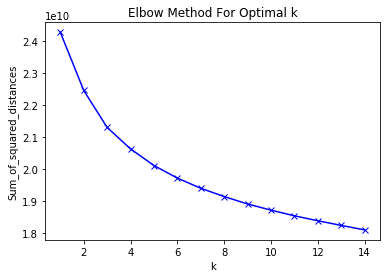

In [25]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [4]:
import pickle
road_df=pd.read_csv('withoutkmeans_exp.csv').iloc[:, 1:]
kmeans = KMeans(n_clusters=8)
model=kmeans.fit(road_df)
print(model)
pickle.dump(model, open('kmeansmodel.pkl', 'wb')) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [5]:
main_folder=r"D:\TYETA\CV\Data_Set"

for folder in os.listdir(main_folder):
    model = pickle.load(open('kmeansmodel.pkl', "rb"))
    path=os.path.join(main_folder,folder)
    for filename in os.listdir(path):
        p=os.path.join(path,filename)
        a=cv2.imread(p)
        resize=(300,300)
        img=cv2.resize(a,resize)#resize image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        orb = cv2.ORB_create()#initialise  detector
        keypoints, descriptors = orb.detectAndCompute(gray, None)
        out=pd.DataFrame(descriptors)
        
        output=pd.DataFrame(model.predict(out))
        hist=np.histogram(output.values,bins=[0,1,2,3,4,5,6,7,8])
        histout=pd.DataFrame(hist[0])
        
        csv_data=histout.transpose().to_csv(str(folder)+'_1_exp'+'.csv', mode='a', header=False)
        
    print('KMeans of ' + str(folder) +' images Done!')


KMeans of Cement Road images Done!
KMeans of Kaccha Road images Done!
KMeans of Paver Road images Done!
KMeans of Tarcoal Road images Done!


In [50]:
from csv import writer
from csv import reader

main_folder=r"D:\TYETA\CV\Data_Set"
classes=['Cement','Kaccha','Paver','Tarcoal']
i=0
for folder in os.listdir(main_folder):
    with open(str(folder)+'_1_exp'+'.csv', 'r') as read_obj, \
        open('Final_ORB_kmeans_exp.csv', 'a+', newline='') as write_obj:
        csv_reader = reader(read_obj)     # Create a csv.reader object from the input file object
        csv_writer = writer(write_obj)    # Create a csv.writer object from the output file object
        # Read each row of the input csv file as list
        for row in csv_reader:
            row.append(classes[i])            # Append the class in the row / list
            csv_writer.writerow(row)      # Add the updated row / list to the output file
    i+=1
    

In [51]:
out4=pd.read_csv('Final_ORB_kmeans_exp.csv')
print(out4)

     0   13   57  29  20   40  44   50   32   Cement
0    0   22   64  34  28   30  49   68   57   Cement
1    0    2    0   0   1    4   2    2    1   Cement
2    0   17   52  24  50   27  35   40   63   Cement
3    0   21   33  23  61   37  46   46   65   Cement
4    0   37  112  22  28   55  58   69   21   Cement
5    0   27  120  20  19   23  33   52   31   Cement
6    0    8  105  18  25   65  59   41   57   Cement
7    0   24   60   9  35   45  44   51   38   Cement
8    0   18   49  20  21   47  40   33   44   Cement
9    0   33   44  21  39   42  48   34   60   Cement
10   0   32   29  57  44   49  72   61   54   Cement
11   0   71   18  57  46   40  50   41   30   Cement
12   0   38   43  79  40   14  82   62   55   Cement
13   0   37   16  57  44   33  33   50   44   Cement
14   0   37   12  34  58   49  26   35   47   Cement
15   0   60   11  44  63   33  42   82   52   Cement
16   0   11   65  18  17   25  52   58   45   Cement
17   0   37    6  31  46   13  38   28   37   

In [52]:
dataset = pd.read_csv('Final_ORB_kmeans_exp.csv')
X = dataset.iloc[:, 1:9].values
y = dataset.iloc[:, 9].values
print(X.shape)
print(y.shape)

(399, 8)
(399,)


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [54]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [55]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(y_pred)

['Kaccha' 'Paver' 'Paver' 'Kaccha' 'Paver' 'Tarcoal' 'Kaccha' 'Paver'
 'Kaccha' 'Kaccha' 'Cement' 'Kaccha' 'Cement' 'Kaccha' 'Tarcoal' 'Cement'
 'Cement' 'Kaccha' 'Kaccha' 'Cement' 'Kaccha' 'Cement' 'Kaccha' 'Cement'
 'Kaccha' 'Paver' 'Kaccha' 'Tarcoal' 'Paver' 'Cement' 'Kaccha' 'Paver'
 'Tarcoal' 'Kaccha' 'Cement' 'Kaccha' 'Tarcoal' 'Paver' 'Kaccha' 'Paver'
 'Kaccha' 'Tarcoal' 'Kaccha' 'Tarcoal' 'Kaccha' 'Paver' 'Tarcoal'
 'Tarcoal' 'Kaccha' 'Cement' 'Kaccha' 'Kaccha' 'Paver' 'Paver' 'Cement'
 'Kaccha' 'Tarcoal' 'Kaccha' 'Paver' 'Cement' 'Paver' 'Paver' 'Kaccha'
 'Tarcoal' 'Cement' 'Tarcoal' 'Paver' 'Kaccha' 'Kaccha' 'Paver' 'Cement'
 'Paver' 'Cement' 'Cement' 'Kaccha' 'Cement' 'Tarcoal' 'Tarcoal' 'Tarcoal'
 'Cement' 'Tarcoal' 'Cement' 'Cement' 'Kaccha' 'Paver' 'Kaccha' 'Kaccha'
 'Paver' 'Tarcoal' 'Kaccha' 'Cement' 'Kaccha' 'Paver' 'Paver' 'Cement'
 'Kaccha' 'Kaccha' 'Kaccha' 'Paver' 'Tarcoal' 'Paver' 'Paver' 'Tarcoal'
 'Kaccha' 'Paver' 'Tarcoal' 'Kaccha' 'Tarcoal' 'Kaccha' 'Paver' 'C

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[14  7  6  6]
 [ 4 22  3  0]
 [ 5  8 13  1]
 [ 3  4  8 16]]
             precision    recall  f1-score   support

     Cement       0.54      0.42      0.47        33
     Kaccha       0.54      0.76      0.63        29
      Paver       0.43      0.48      0.46        27
    Tarcoal       0.70      0.52      0.59        31

avg / total       0.55      0.54      0.54       120

0.5416666666666666


In [57]:
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5416666666666666


In [58]:
image = cv2.imread('D:\TYETA\CV\Data_Set\Kaccha Road\70.jpg')
image= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

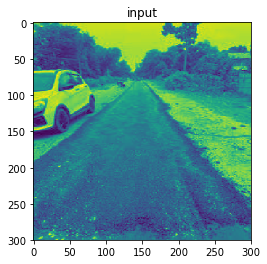

In [71]:
model = pickle.load(open('kmeansmodel.pkl', "rb"))
main_folder=r"D:\TYETA\CV\Data_Set\Tarcoal Road"

p=os.path.join(main_folder,'78.jpg')
a=cv2.imread(p)
resize=(300,300)
img=cv2.resize(a,resize)#resize image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title('input')
plt.show()

orb = cv2.ORB_create()#initialise  detector
keypoints, descriptors = orb.detectAndCompute(gray, None)
out=pd.DataFrame(descriptors)
        
output=pd.DataFrame(model.predict(out))
hist=np.histogram(output.values,bins=[0,1,2,3,4,5,6,7,8])
histout=pd.DataFrame(hist[0])

In [72]:
m=[]
m.append(hist[0])

output=pd.DataFrame(m)
print(output)
x1 = output.iloc[:, 0:9]

prediction=clf.predict(x1)
print(prediction)

    0   1   2   3   4   5   6   7
0  48  59  31  53  49  71  65  50
['Tarcoal']
